## Step 1: Import Necessary Libraries

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess the MNIST Dataset

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist["data"], mnist["target"].astype(np.int32)

# Normalize the data
scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mnist_scaled, y_mnist, test_size=0.2, random_state=42)


## Step 3: One-Hot Encode the Labels

In [ ]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# One-hot encode the labels
num_classes = 10
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)


# Step 4: Implement Least Squares Model

In [ ]:
# Using np.linalg.lstsq to compute the weight matrix
W, residuals, rank, s = np.linalg.lstsq(X_train, y_train_one_hot, rcond=None)

# Step 5: Prediction and Evaluation

In [ ]:
# Prediction function
def predict(X, W):
    predictions = X @ W  # Matrix multiplication
    return np.argmax(predictions, axis=1)  # Select class with highest score

# Predict labels for training and test sets
y_train_pred = predict(X_train, W)
y_test_pred = predict(X_test, W)

# Calculate accuracy
train_accuracy = np.mean(y_train_pred == y_train) * 100
test_accuracy = np.mean(y_test_pred == y_test) * 100

print("Training Accuracy:", train_accuracy, "%")
print("Test Accuracy:", test_accuracy, "%")

Training Accuracy: 85.94821428571429 %
Test Accuracy: 85.38571428571429 %



# Step 6: Visualization of Accurately Predicted Images

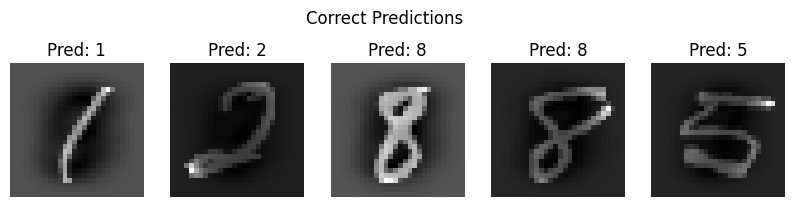

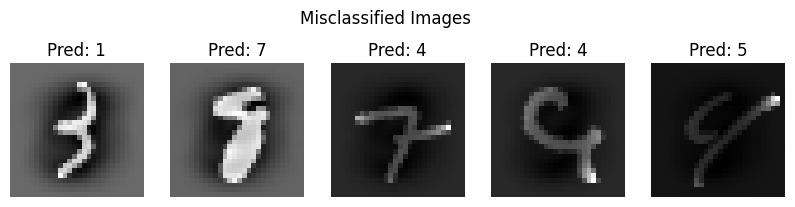

In [ ]:
def visualize_predictions(X, y_true, y_pred, title="Correct Predictions", correct=True, num_images=5):
    indices = np.where((y_true == y_pred) if correct else (y_true != y_pred))[0]
    selected_indices = np.random.choice(indices, num_images, replace=False)

    plt.figure(figsize=(10, 2))
    plt.suptitle(title, y=1.1)
    for i, idx in enumerate(selected_indices):
        image = X[idx].reshape(28, 28)  # Reshape flat 784 array to 28x28 image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap="gray")
        plt.axis("off")
        plt.title(f"Pred: {y_pred[idx]}")
    plt.show()

# Display correctly predicted images
visualize_predictions(X_test, y_test, y_test_pred, title="Correct Predictions", correct=True, num_images=5)

# Optional: Visualization of Misclassified Images
visualize_predictions(X_test, y_test, y_test_pred, title="Misclassified Images", correct=False, num_images=5)